In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/Users/Tim/PycharmProjects/HOI/')

In [3]:
import sys
sys.path

['/Users/tim/PycharmProjects/HOI/examples',
 '/Users/tim/opt/anaconda3/lib/python39.zip',
 '/Users/tim/opt/anaconda3/lib/python3.9',
 '/Users/tim/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/tim/opt/anaconda3/lib/python3.9/site-packages',
 '/Users/tim/opt/anaconda3/lib/python3.9/site-packages/aeosa',
 '/Users/Tim/PycharmProjects/HOI/']

In [4]:
import os
os.getcwd()

'/Users/tim/PycharmProjects/HOI/examples'

In [5]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from ipywidgets import IntProgress

In [12]:
from synthetic_data import stationary_pb_ts, nonstationary_ts_n, stationary_pb_ts_n, make_iid_example, make_iid_example_4way
from HOI.preprocessings import compute_kernel, compute_kernel_n
from HOI.tests import test_independence

In [7]:
import matplotlib.pyplot as plt

In [259]:
def plot_cor(data, mode):
    x = np.arange(0.1, 1, 0.05)
    y = np.array(data)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    # ax.set_ylim(0, 1.05)
    ax.set_xlabel('dependence coefficient')
    ax.set_ylabel(mode)
    ax.set_title(mode)
    plt.plot(x,y, marker='o', color='b')
    for i,j in zip(x,y):
        ax.annotate(str(j),xy=(i,j))
    plt.show()

In [260]:
from HOI.normalisation import dHcor2_std, dHcor2_norm, lcor2_norm, lcor2_std

In [261]:
def plot_test(data, mode):
    x = np.arange(0.1, 1, 0.1)
    y = np.array(data)

    fig = plt.figure(dpi=800)
    ax = fig.add_subplot(111)
    ax.set_ylim(0,1.05)
    ax.set_xlabel('dependence coefficient')
    ax.set_ylabel(mode)
    ax.set_title(mode + ' of dHSIC independence tests')
    plt.plot(x,y, marker='o', color='b')
    for i,j in zip(x,y):
        ax.annotate(str(j),xy=(i,j))
    plt.show()

# 3way iid

In [262]:
cor_n = []
cor_s = []
for s in tqdm(np.arange(0.1, 1, 0.05)):
    df = make_iid_example('higher-order', s = s, n_sample=300)
    _, kernel_dict = compute_kernel(df)
    k_list = list(kernel_dict.values())
    cor_n.append(lcor2_norm(k_list))
    cor_s.append(lcor2_std(k_list))

  0%|          | 0/18 [00:00<?, ?it/s]

In [263]:
cor_n = [ round(elem, 3) for elem in cor_n ]
cor_s = [ round(elem, 3) for elem in cor_s ]

In [264]:
np.array(cor_s)/ np.array(cor_n)

array([0.53571429, 0.61538462, 0.57142857, 0.55102041, 0.55555556,
       0.58947368, 0.55445545, 0.48554913, 0.52272727, 0.47113164,
       0.38695652, 0.34573304, 0.26029567, 0.19981031, 0.12134027,
       0.06075556, 0.01585237, 0.01059232])

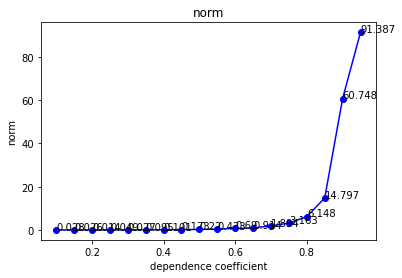

In [265]:
plot_cor(cor_n, 'norm')

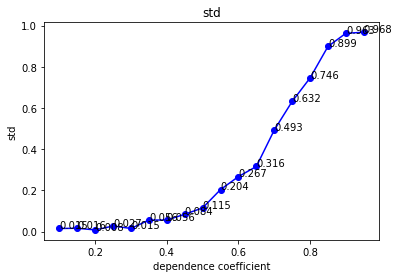

In [266]:
plot_cor(cor_s, 'std')

In [267]:
cor_n = []
cor_s = []
for s in tqdm(np.arange(0.1, 1, 0.05)):
    df = make_iid_example('multi-normal', s = s, n_sample=300)
    _, kernel_dict = compute_kernel(df)
    k_list = list(kernel_dict.values())
    cor_n.append(lcor2_norm(k_list))
    cor_s.append(lcor2_std(k_list))

  0%|          | 0/18 [00:00<?, ?it/s]

In [268]:
cor_n = [ round(elem, 3) for elem in cor_n ]
cor_s = [ round(elem, 3) for elem in cor_s ]

In [269]:
np.array(cor_s)/ np.array(cor_n)

array([0.6875    , 0.66666667, 0.70588235, 0.68181818, 0.63333333,
       0.6       , 0.57627119, 0.56578947, 0.67241379, 0.64102564,
       0.65060241, 0.65492958, 0.61165049, 0.64397906, 0.6361186 ,
       0.66529774, 0.51012891, 0.69535519])

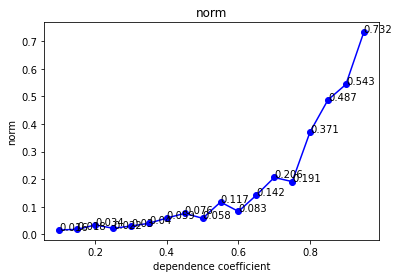

In [270]:
plot_cor(cor_n, 'norm')

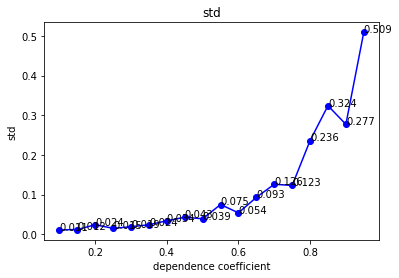

In [271]:
plot_cor(cor_s, 'std')

In [272]:
cor_n = []
cor_s = []
for s in tqdm(np.arange(0.1, 1, 0.05)):
    df = make_iid_example('interpolated', s = s, n_sample=300)
    _, kernel_dict = compute_kernel(df)
    k_list = list(kernel_dict.values())
    cor_n.append(lcor2_norm(k_list))
    cor_s.append(lcor2_std(k_list))

  0%|          | 0/18 [00:00<?, ?it/s]

In [273]:
cor_n = [ round(elem, 3) for elem in cor_n ]
cor_s = [ round(elem, 3) for elem in cor_s ]

In [274]:
np.array(cor_s)/ np.array(cor_n)

array([0.61111111, 0.63636364, 0.58333333, 0.58064516, 0.625     ,
       0.58823529, 0.58974359, 0.57692308, 0.58974359, 0.62601626,
       0.58677686, 0.59533074, 0.57048458, 0.65116279, 0.73790323,
       0.59760479, 0.66666667, 0.63238289])

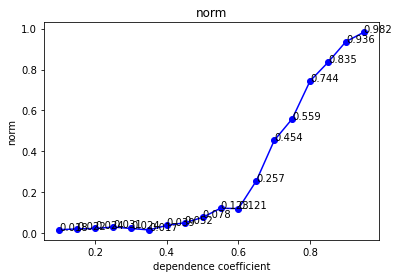

In [275]:
plot_cor(cor_n, 'norm')

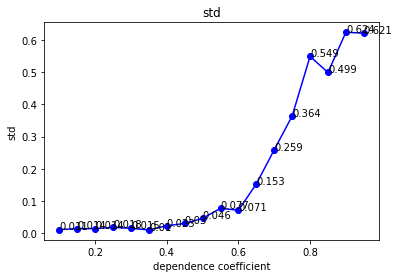

In [276]:
plot_cor(cor_s, 'std')

In [277]:
mean = [0, 0, 0, 0]
cov = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]

x, x1, x2, x3 = np.random.multivariate_normal(mean, cov, 300).T
d1, d2, d3 = s * x + (1 - s) * x1, s * x + (1 - s) * x2, s * x + (1 - s) * x3
df = pd.DataFrame(list(zip(d1, d2, d3)), columns=['d1', 'd2', 'd3'])
_, kernel_dict = compute_kernel(df)
k_list = list(kernel_dict.values())
cor_n = lcor2_norm(k_list)
cor_s = lcor2_std(k_list)

In [278]:
cor_n, cor_s

(0.9845606780862523, 0.4679742325491273)

# 3way stationary

In [279]:
cor_n = []
cor_s = []
for s in tqdm(np.arange(0.1, 1, 0.05)):
    df = stationary_pb_ts(t_time = 300, d = s, mode = "case1", a=0.5)
    _, kernel_dict = compute_kernel(df)
    k_list = list(kernel_dict.values())
    cor_n.append(lcor2_norm(k_list))
    cor_s.append(lcor2_std(k_list))

  0%|          | 0/18 [00:00<?, ?it/s]

In [280]:
cor_n = [ round(elem, 3) for elem in cor_n ]
cor_s = [ round(elem, 3) for elem in cor_s ]

In [281]:
np.array(cor_s)/ np.array(cor_n)

array([0.70967742, 0.53846154, 0.69444444, 0.63636364, 0.64788732,
       0.68571429, 0.64893617, 0.6031746 , 0.73015873, 0.675     ,
       0.63291139, 0.61643836, 0.65454545, 0.60185185, 0.66917293,
       0.64864865, 0.69590643, 0.6884058 ])

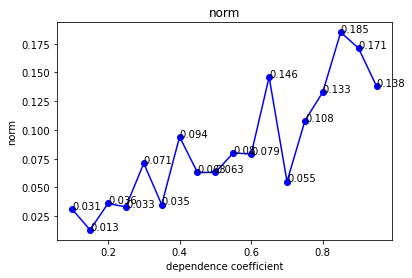

In [282]:
plot_cor(cor_n, 'norm')

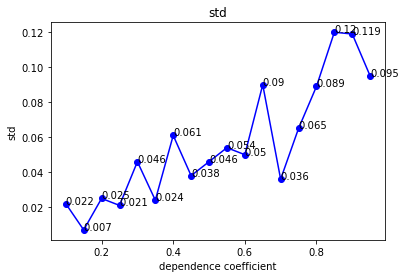

In [283]:
plot_cor(cor_s, 'std')

In [284]:
cor_n = []
cor_s = []
for s in tqdm(np.arange(0.1, 1, 0.05)):
    df = stationary_pb_ts(t_time = 300, d = s, mode = "case2", a=0.5)
    _, kernel_dict = compute_kernel(df)
    k_list = list(kernel_dict.values())
    cor_n.append(lcor2_norm(k_list))
    cor_s.append(lcor2_std(k_list))

  0%|          | 0/18 [00:00<?, ?it/s]

In [285]:
cor_n = [ round(elem, 3) for elem in cor_n ]
cor_s = [ round(elem, 3) for elem in cor_s ]

In [286]:
np.array(cor_s)/ np.array(cor_n)

array([0.66666667, 0.62962963, 0.625     , 0.65      , 0.5483871 ,
       0.67857143, 0.70588235, 0.62222222, 0.6744186 , 0.62068966,
       0.63636364, 0.66386555, 0.6       , 0.62      , 0.61068702,
       0.65384615, 0.61870504, 0.65441176])

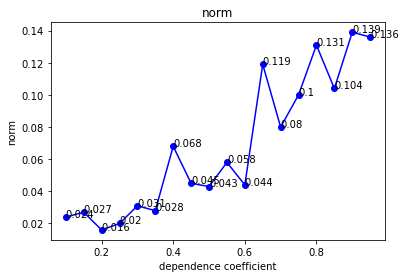

In [287]:
plot_cor(cor_n, 'norm')

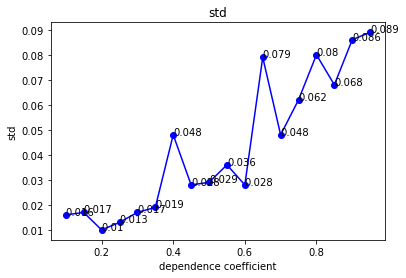

In [288]:
plot_cor(cor_s, 'std')

In [289]:
cor_n = []
cor_s = []
for s in tqdm(np.arange(0.1, 1, 0.05)):
    df = stationary_pb_ts(t_time = 300, d = s, mode = "case3", a=0.5)
    _, kernel_dict = compute_kernel(df)
    k_list = list(kernel_dict.values())
    cor_n.append(lcor2_norm(k_list))
    cor_s.append(lcor2_std(k_list))

  0%|          | 0/18 [00:00<?, ?it/s]

In [290]:
cor_n = [ round(elem, 3) for elem in cor_n ]
cor_s = [ round(elem, 3) for elem in cor_s ]

In [291]:
np.array(cor_s)/ np.array(cor_n)

array([0.58823529, 0.54347826, 0.65625   , 0.70588235, 0.65789474,
       0.6       , 0.6       , 0.63636364, 0.66666667, 0.63636364,
       0.61538462, 0.62068966, 0.69230769, 0.57142857, 0.66666667,
       0.63157895, 0.66666667, 0.6       ])

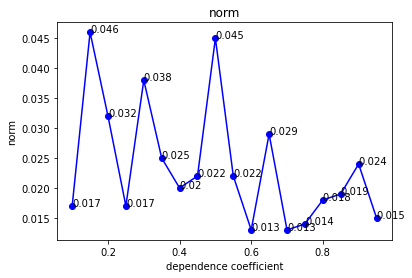

In [292]:
plot_cor(cor_n, 'norm')

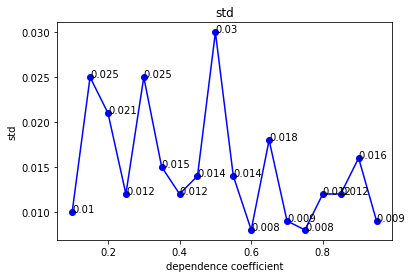

In [293]:
plot_cor(cor_s, 'std')